Student Details

Name: Cathal Cronin

ID: 10131531

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd

Sample code to plot SVM margin, 'gutters' and support vectors

In [2]:
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)


# # plot the decision function
# ax = plt.gca()
# ax.set_aspect(aspect=1)
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# # create grid to evaluate model
# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

# # plot decision boundary and margins
# ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#            linestyles=['--', '-', '--'])
# # plot support vectors
# ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')



### Task 4
- Perform classification on dataset_1 using an SVM with linear kernel and experiment with the C-parameter to find the widest margin solution with a hard margin and a soft margin. 

In [3]:
df = pd.read_csv("./dataset_1.csv")
df.describe()

,Unnamed: 0,0,1,2
count,10001.000000,10001.000000,10001.000000,10001.000000
mean,5000.000000,0.082508,-0.004040,0.668233
std,2887.184355,0.615153,0.575639,0.470871
min,0.000000,-0.999635,-1.400000,0.000000
25%,2500.000000,-0.496767,-0.496319,0.000000
50%,5000.000000,0.208210,-0.006960,1.000000
75%,7500.000000,0.614940,0.491170,1.000000
max,10000.000000,0.999983,0.999918,1.000000


In [4]:
# Look at some of the values 
df.head()
# column 2 looks like our target to classify.

,Unnamed: 0,0,1,2
0,0,-0.331982,-0.926029,1.0
1,1,-0.819310,-0.242368,0.0
2,2,0.922427,0.499088,1.0
3,3,-0.570793,0.562286,0.0
4,4,0.375817,-0.941165,1.0


- column 2 looks like our target to classify.

In [5]:
df['2'].value_counts()
# Looks like a 33% / 66% split in the values.

X = df.drop(["Unnamed: 0", "2"], axis=1) 
y = df["2"]

In [6]:
X_np = preprocessing.scale(X.values)
y_np = y.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.20, shuffle=True, stratify=y)

# linear kernel
#clf = svm.SVC(kernel='linear', C=0.001)
C = 1
clf = svm.SVC(kernel='linear', C=C)
clf.kernel


clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
clf.score(X_test, y_test)

1.0

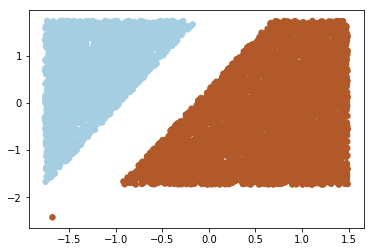

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

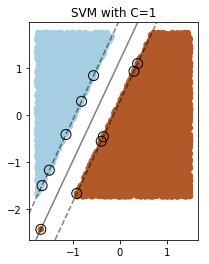

In [10]:
def plot_svm(clf, X_train, y_train, C):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    title = 'SVM with C=' + str(C)
    plt.title(title)

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

    
    plt.show()

    
def print_metrics(clf, C, score):
    header = "="*10 + " SVM with C=" + str(C) + " " + "="*10
    print(header)
    print("Nb support vectors: ", len(clf.support_vectors_))
    print("Nb support vectors per class:", clf.n_support_ )
    print("Score :", score)
    #print("Support vectors   : ", clf.support_vectors_)
    return len(clf.support_vectors_)
    
plot_svm(clf, X_train, y_train, C)

- try variations of c

========== SVM with C=0.001 ==========
Nb support vectors:  2475
Nb support vectors per class: [1237 1238]
Score : 1.0


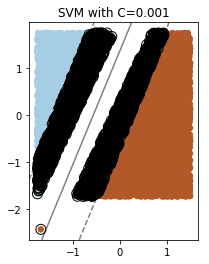

========== SVM with C=0.01 ==========
Nb support vectors:  550
Nb support vectors per class: [275 275]
Score : 1.0


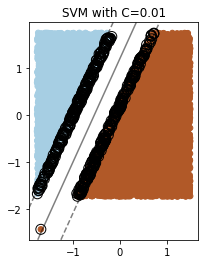

========== SVM with C=0.1 ==========
Nb support vectors:  73
Nb support vectors per class: [36 37]
Score : 1.0


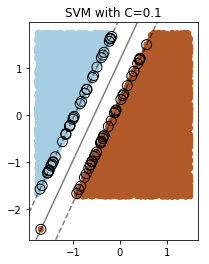

========== SVM with C=1 ==========
Nb support vectors:  11
Nb support vectors per class: [5 6]
Score : 1.0


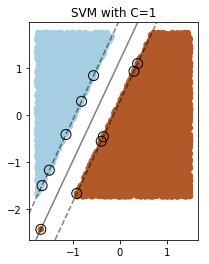

========== SVM with C=10 ==========
Nb support vectors:  4
Nb support vectors per class: [2 2]
Score : 1.0


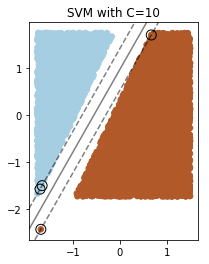

========== SVM with C=50 ==========
Nb support vectors:  3
Nb support vectors per class: [1 2]
Score : 1.0


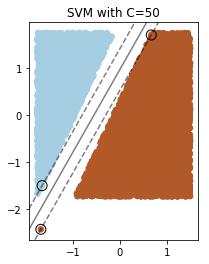

========== SVM with C=100 ==========
Nb support vectors:  3
Nb support vectors per class: [1 2]
Score : 1.0


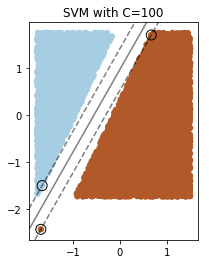

========== SVM with C=1000 ==========
Nb support vectors:  3
Nb support vectors per class: [1 2]
Score : 1.0


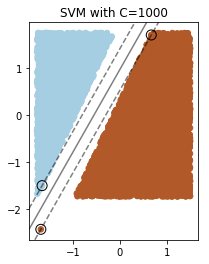

In [11]:
Cs=[0.001, 0.01, 0.1,1, 10, 50, 100, 1000]
nb_sv=[]

for C in Cs:
    clf = svm.SVC(kernel='linear', C=C)
    clf.kernel
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    nb_sv.append(len(clf.support_vectors_))
    print_metrics(clf, C, score)
    plot_svm(clf, X_train, y_train, C)


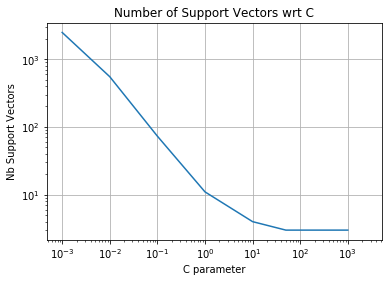

In [12]:
plt.plot(Cs, nb_sv)
plt.ylabel('Nb Support Vectors')
plt.xlabel('C parameter')
plt.title('Number of Support Vectors wrt C')

ax = plt.gca()
ax.semilogx(C, np.exp(-C))
ax.semilogy(np.amax(nb_sv), np.exp(-np.amax(nb_sv)))

ax.grid()
plt.show()

- Long ass observations here

### Task 5
- Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using Support Vector Machines and choose suitable kernels and hyper-parameters.

In [13]:
def make_svc_grid_search():

    # param_grid based on 2 separate entries, one for linear kernel, another one for rbf/poly. 
    # Inspired by Abhijit Sinha
    #### poly is taking ages to complete.
    param_grid = [{'kernel': ['linear'], 'C': [0.01, 10, 100]},
                  {'kernel': ['rbf'], 'gamma': [0.01, 1, 'auto'], 'C': [0.01, 10, 100], 'degree': [2]}]
    
    svm_classifier = svm.SVC()
    return GridSearchCV(svm_classifier, param_grid, cv=10, scoring='accuracy', n_jobs=10)

    
    
def run_gridsearch(grid_search, X_train, y_train, X_test, y_test):
    grid_search.fit(X_train, y_train)
    
    # Calculate Expected Eout
    nb_sv = len(grid_search.best_estimator_.support_vectors_)
    nb_samples = len(X_train)
    Eeout = nb_sv / (nb_samples - 1) 
    
    # Calculate Eout as the score on test data
    tst_data_score = grid_search.best_estimator_.score(X_test, y_test)
    
    print("best params    : ", grid_search.best_params_)
    print("best score     : ", grid_search.best_score_ )
    print("nb SV          : ", nb_sv)
    print("expected[Eout] : ", Eeout)
    print("test_data_score: ", tst_data_score)
    
    return grid_search

In [14]:
def plot_svm_grdsrch(X_train, y_train, clf):
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)


    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [15]:
df1 = pd.read_csv("./dataset_1.csv")
df1.describe()

,Unnamed: 0,0,1,2
count,10001.000000,10001.000000,10001.000000,10001.000000
mean,5000.000000,0.082508,-0.004040,0.668233
std,2887.184355,0.615153,0.575639,0.470871
min,0.000000,-0.999635,-1.400000,0.000000
25%,2500.000000,-0.496767,-0.496319,0.000000
50%,5000.000000,0.208210,-0.006960,1.000000
75%,7500.000000,0.614940,0.491170,1.000000
max,10000.000000,0.999983,0.999918,1.000000


In [16]:
df2 = pd.read_csv("./dataset_2.csv")
df2.describe()

,Unnamed: 0,0,1,2
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.000081,-0.000563,0.332800
std,2886.89568,0.574913,0.274366,0.471239
min,0.00000,-0.999780,-0.951513,0.000000
25%,2499.75000,-0.506704,-0.182047,0.000000
50%,4999.50000,0.001152,-0.002540,0.000000
75%,7499.25000,0.494439,0.180595,1.000000
max,9999.00000,0.999979,0.956530,1.000000


In [17]:
df3 = pd.read_csv("./dataset_3.csv")
df3.describe()

,Unnamed: 0,0,1,2
count,10000.00000,10000.000000,10000.000000,10000.00000
mean,4999.50000,-0.004890,-0.002304,0.88240
std,2886.89568,0.612958,0.616565,0.32215
min,0.00000,-0.999962,-0.999991,0.00000
25%,2499.75000,-0.571095,-0.585002,1.00000
50%,4999.50000,-0.007848,-0.007517,1.00000
75%,7499.25000,0.561483,0.585625,1.00000
max,9999.00000,0.999805,0.999790,1.00000


In [18]:
X1 = df1.drop(["Unnamed: 0", "2"], axis=1)
y1 = df1["2"]

X2 = df2.drop(["Unnamed: 0", "2"], axis=1)
y2 = df2["2"]

X3 = df3.drop(["Unnamed: 0", "2"], axis=1)
y3 = df3["2"]

In [19]:
X1_np = preprocessing.scale(X1.values)
y1_np = y1.values

X2_np = preprocessing.scale(X2.values)
y2_np = y2.values

X3_np = preprocessing.scale(X3.values)
y3_np = y3.values

In [20]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_np, y1_np, test_size=0.20, shuffle=True, stratify=y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_np, y2_np, test_size=0.20, shuffle=True, stratify=y2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_np, y3_np, test_size=0.20, shuffle=True, stratify=y3)

In [21]:
clf1 = run_gridsearch(make_svc_grid_search(), X1_train, y1_train, X1_test, y1_test)

best params    :  {'kernel': 'linear', 'C': 0.01}
best score     :  1.0
nb SV          :  550
expected[Eout] :  0.06875859482435305
test_data_score:  0.9995002498750625


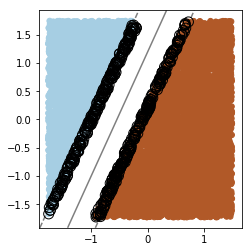

In [22]:
plot_svm_grdsrch(X1_train, y1_train, clf1)

In [29]:
clf2 = run_gridsearch(make_svc_grid_search(), X2_train, y2_train, X2_test, y2_test)

best params    :  {'degree': 2, 'kernel': 'rbf', 'C': 10, 'gamma': 'auto'}
best score     :  0.866
nb SV          :  2582
expected[Eout] :  0.3227903487935992
test_data_score:  0.8685


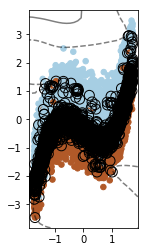

In [30]:
plot_svm_grdsrch(X2_train, y2_train, clf2)

In [31]:
clf3 = run_gridsearch(make_svc_grid_search(), X3_train, y3_train,  X3_test, y3_test)

best params    :  {'degree': 2, 'kernel': 'rbf', 'C': 10, 'gamma': 'auto'}
best score     :  0.987375
nb SV          :  280
expected[Eout] :  0.03500437554694337
test_data_score:  0.9895


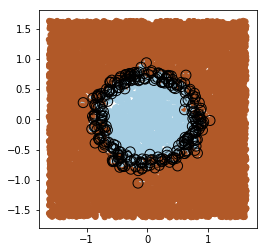

In [32]:
plot_svm_grdsrch(X3_train, y3_train, clf3)

In [27]:
# Long ass observations here 

In [28]:
# https://stackoverflow.com/questions/17455302/gridsearchcv-extremely-slow-on-small-dataset-in-scikit-learn